In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency , spearmanr , shapiro

import warnings 
warnings.filterwarnings("ignore")

In [2]:
cards = pd.read_csv(r"C:\Users\Abhishek\Downloads\Cards Data.csv")
users = pd.read_csv(r"C:\Users\Abhishek\Downloads\Users Data.csv")

In [3]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [5]:
users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [6]:
cards.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [7]:
cards.isna().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

In [8]:
cards.duplicated().sum()

np.int64(0)

In [9]:
users.duplicated().sum()

np.int64(0)

In [10]:
df = cards.merge(users,how="left", left_on="client_id", right_on="id")

In [11]:
df.isna().sum()

id_x                     0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
id_y                     0
current_age              0
retirement_age           0
birth_year               0
birth_month              0
gender                   0
address                  0
latitude                 0
longitude                0
per_capita_income        0
yearly_income            0
total_debt               0
credit_score             0
num_credit_cards         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.head()

,id_x,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,...,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,...,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,...,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,...,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,...,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5


In [14]:
df["card_brand"].value_counts()

card_brand
Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: count, dtype: int64

In [15]:
df["card_type"].value_counts()

card_type
Debit              3511
Credit             2057
Debit (Prepaid)     578
Name: count, dtype: int64

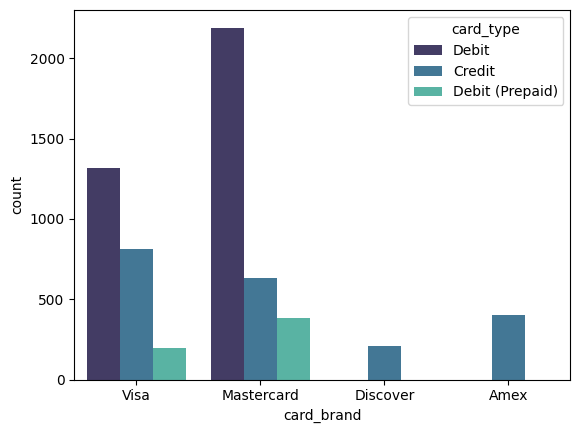

In [16]:
sns.countplot(df,x="card_brand", hue="card_type", palette ="mako")
plt.show()

In [17]:
df.columns

Index(['id_x', 'client_id', 'card_brand', 'card_type', 'card_number',
       'expires', 'cvv', 'has_chip', 'num_cards_issued', 'credit_limit',
       'acct_open_date', 'year_pin_last_changed', 'card_on_dark_web', 'id_y',
       'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender',
       'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [18]:
df.drop(["id_x","id_y",'card_number','expires','cvv'], axis=1, inplace=True)

In [19]:
df.head()

,client_id,card_brand,card_type,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,Visa,Debit,YES,2,$24295,09/2002,2008,No,53,...,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,825,Visa,Debit,YES,2,$21968,04/2014,2014,No,53,...,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
2,825,Visa,Debit,YES,2,$46414,07/2003,2004,No,53,...,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
3,825,Visa,Credit,NO,1,$12400,01/2003,2012,No,53,...,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
4,825,Mastercard,Debit (Prepaid),YES,1,$28,09/2008,2009,No,53,...,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5


In [20]:
df["has_chip"].value_counts()

has_chip
YES    5500
NO      646
Name: count, dtype: int64

In [21]:
df["acc_open_month"] = df["acct_open_date"].str.split("/").apply(lambda x: x[0])

In [22]:
df["acc_open_year"] = df["acct_open_date"].str.split("/").apply(lambda x: x[1])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              6146 non-null   int64  
 1   card_brand             6146 non-null   object 
 2   card_type              6146 non-null   object 
 3   has_chip               6146 non-null   object 
 4   num_cards_issued       6146 non-null   int64  
 5   credit_limit           6146 non-null   object 
 6   acct_open_date         6146 non-null   object 
 7   year_pin_last_changed  6146 non-null   int64  
 8   card_on_dark_web       6146 non-null   object 
 9   current_age            6146 non-null   int64  
 10  retirement_age         6146 non-null   int64  
 11  birth_year             6146 non-null   int64  
 12  birth_month            6146 non-null   int64  
 13  gender                 6146 non-null   object 
 14  address                6146 non-null   object 
 15  lati

In [24]:
df.query("has_chip == 'NO'") ["acc_open_year"].describe()

count      646
unique      26
top       2020
freq       132
Name: acc_open_year, dtype: object

In [25]:
df.query("has_chip =='YES'")["acc_open_year"].min()

'1991'

In [26]:
df["acc_open_year"].max()

'2020'

In [27]:
df["client_id"].value_counts()

client_id
1741    9
797     9
1301    9
20      8
989     8
       ..
97      1
1590    1
1679    1
640     1
1752    1
Name: count, Length: 2000, dtype: int64

In [28]:
cards.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [29]:
for i in ["credit_limit", "per_capita_income", "yearly_income", "total_debt"]:
          df[i] = df[i].str.replace("$", "")
          df[i] = df[i].astype(int)

In [30]:
df.head()

,client_id,card_brand,card_type,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,...,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,acc_open_month,acc_open_year
0,825,Visa,Debit,YES,2,24295,09/2002,2008,No,53,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,09,2002
1,825,Visa,Debit,YES,2,21968,04/2014,2014,No,53,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,04,2014
2,825,Visa,Debit,YES,2,46414,07/2003,2004,No,53,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,07,2003
3,825,Visa,Credit,NO,1,12400,01/2003,2012,No,53,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,01,2003
4,825,Mastercard,Debit (Prepaid),YES,1,28,09/2008,2009,No,53,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,09,2008


In [31]:
max_limit = df.groupby('client_id')["credit_limit"].max().sort_values(ascending=0).head(10).reset_index()

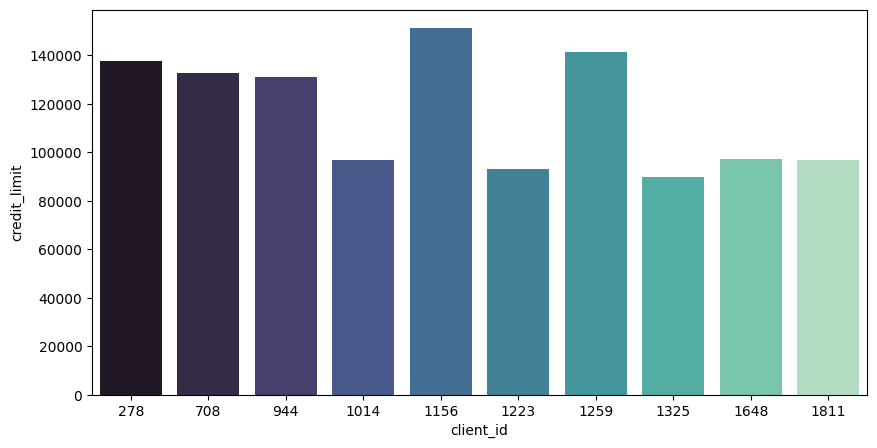

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(max_limit ,x='client_id',y="credit_limit", palette="mako")
plt.show()

In [33]:
card_on_dark_web = df.groupby("client_id")["card_on_dark_web"].value_counts().reset_index()

In [34]:
card_on_dark_web["card_on_dark_web"].value_counts()

card_on_dark_web
No    2000
Name: count, dtype: int64

In [35]:
df.drop("card_on_dark_web", axis=1, inplace=True)

In [36]:
df.head()

,client_id,card_brand,card_type,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,current_age,retirement_age,...,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,acc_open_month,acc_open_year
0,825,Visa,Debit,YES,2,24295,09/2002,2008,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,09,2002
1,825,Visa,Debit,YES,2,21968,04/2014,2014,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,04,2014
2,825,Visa,Debit,YES,2,46414,07/2003,2004,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,07,2003
3,825,Visa,Credit,NO,1,12400,01/2003,2012,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,01,2003
4,825,Mastercard,Debit (Prepaid),YES,1,28,09/2008,2009,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,09,2008


In [37]:
card_credit_limit = df.groupby(["card_brand","card_type"])["credit_limit"].mean().reset_index()

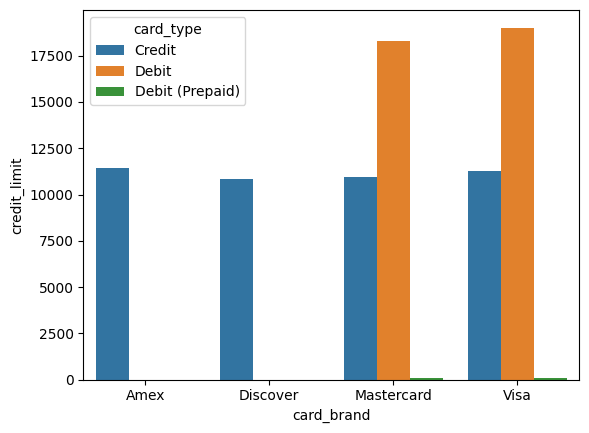

In [38]:
sns.barplot(card_credit_limit, x="card_brand", y="credit_limit",hue="card_type")
plt.show()

<Axes: ylabel='card_brand'>

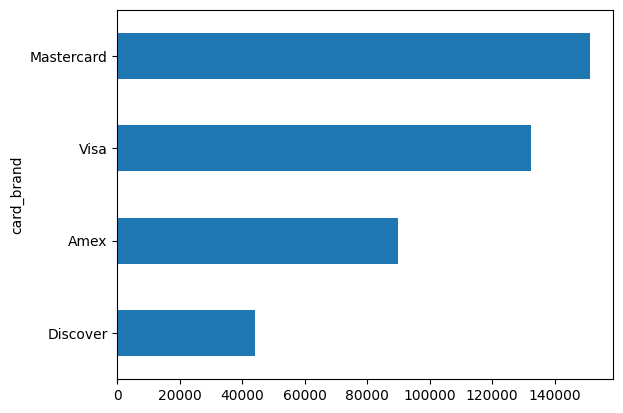

In [39]:
df.groupby(["card_brand"])["credit_limit"].max().sort_values().plot.barh()

<Axes: ylabel='client_id'>

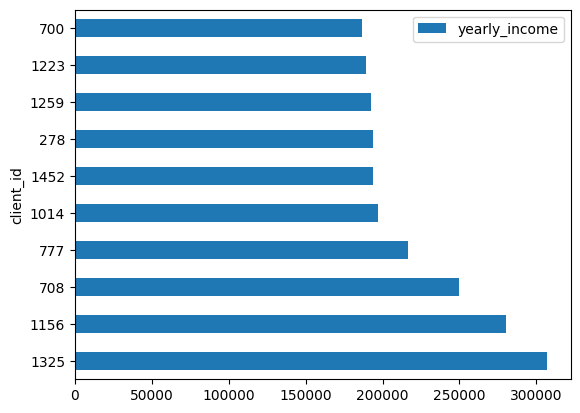

In [40]:
df[["client_id", "yearly_income"]].drop_duplicates().sort_values("yearly_income", ascending=0).head(10)\
.plot.barh(x="client_id",y="yearly_income")

In [41]:
top_client_by_income_debet = df[["client_id", "yearly_income", "total_debt"]].drop_duplicates().sort_values("yearly_income", ascending=0).head(10)

In [42]:
top_client_by_income_debet["net_income"] = top_client_by_income_debet["yearly_income"]\
- top_client_by_income_debet["total_debt"]

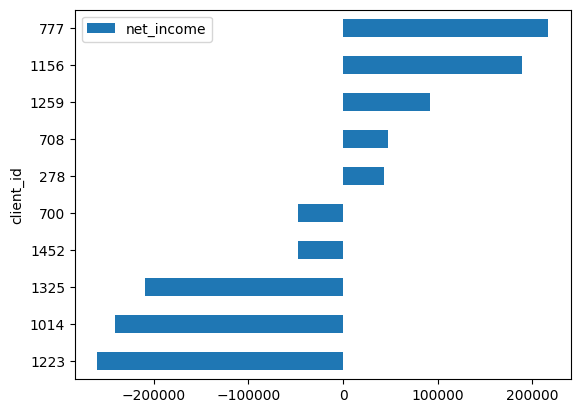

In [43]:
top_client_by_income_debet[["client_id", "net_income"]].sort_values("net_income").plot.barh(x="client_id")
plt.show()

In [44]:
client_credit_score = df[["client_id","credit_score"]].drop_duplicates().sort_values("credit_score", ascending=0)

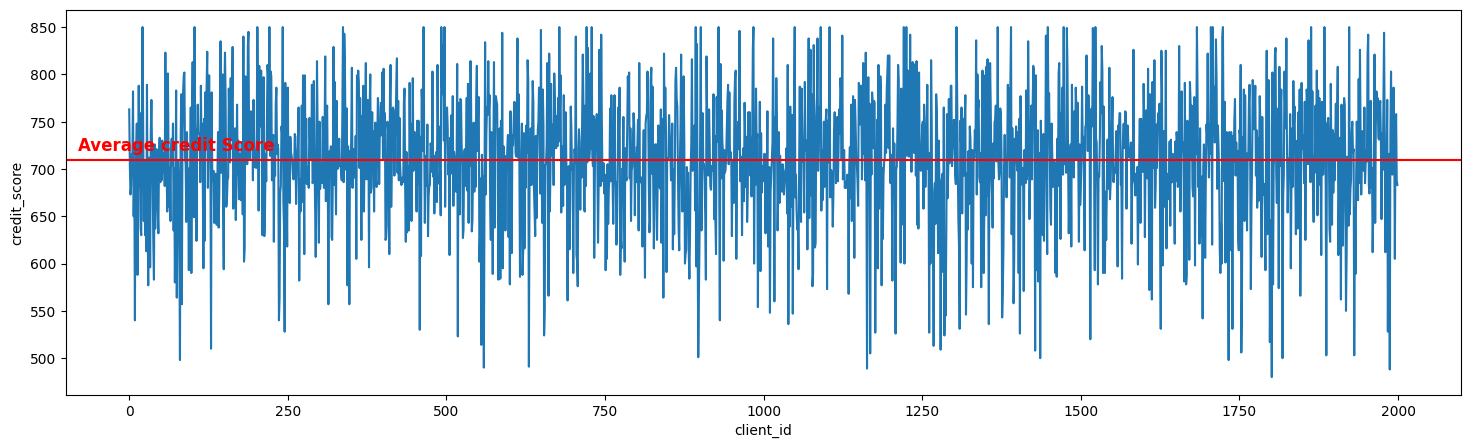

In [45]:
plt.figure(figsize=(18,5))
sns.lineplot(client_credit_score, x="client_id", y="credit_score")
plt.axhline(client_credit_score["credit_score"].mean(), color="red")
plt.text(-80, client_credit_score["credit_score"].mean()+10, "Average credit Score",
       size="large", weight="bold", color="red")
plt.show()

In [46]:
df.head()

,client_id,card_brand,card_type,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,current_age,retirement_age,...,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,acc_open_month,acc_open_year
0,825,Visa,Debit,YES,2,24295,09/2002,2008,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,09,2002
1,825,Visa,Debit,YES,2,21968,04/2014,2014,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,04,2014
2,825,Visa,Debit,YES,2,46414,07/2003,2004,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,07,2003
3,825,Visa,Credit,NO,1,12400,01/2003,2012,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,01,2003
4,825,Mastercard,Debit (Prepaid),YES,1,28,09/2008,2009,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,09,2008


In [47]:
df[["current_age","credit_score"]].drop_duplicates().corr()

,current_age,credit_score
current_age,1.00000,-0.00633
credit_score,-0.00633,1.00000


In [48]:
df[["total_debt","credit_score"]].drop_duplicates().corr()

,total_debt,credit_score
total_debt,1.000000,-0.102047
credit_score,-0.102047,1.000000


In [49]:
df[["yearly_income","credit_score"]].drop_duplicates().corr()

,yearly_income,credit_score
yearly_income,1.000000,0.000167
credit_score,0.000167,1.000000


<Axes: >

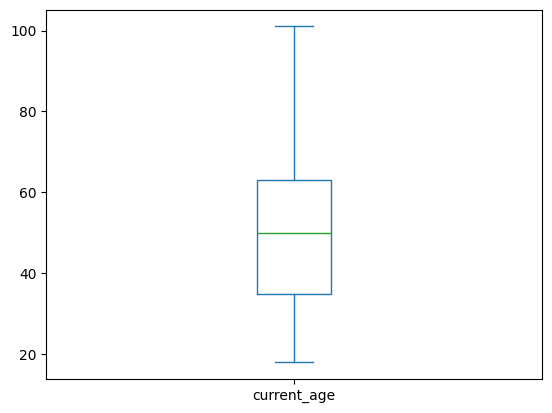

In [50]:
df["current_age"].plot.box()

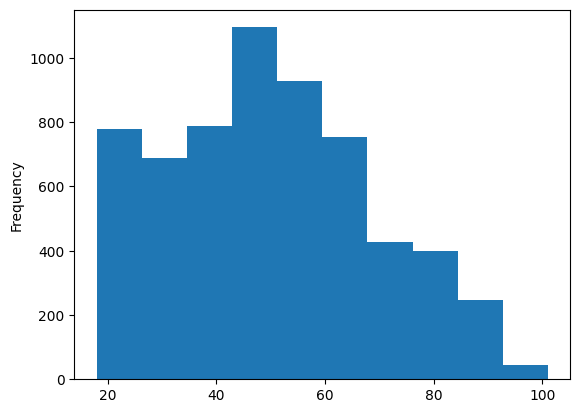

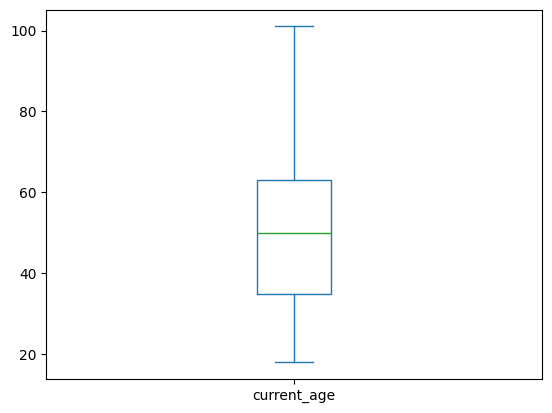

In [51]:
df["current_age"].plot.hist()
plt.show()
df["current_age"].plot.box()
plt.show()

In [52]:
df

,client_id,card_brand,card_type,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,current_age,retirement_age,...,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,acc_open_month,acc_open_year
0,825,Visa,Debit,YES,2,24295,09/2002,2008,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,09,2002
1,825,Visa,Debit,YES,2,21968,04/2014,2014,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,04,2014
2,825,Visa,Debit,YES,2,46414,07/2003,2004,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,07,2003
3,825,Visa,Credit,NO,1,12400,01/2003,2012,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,01,2003
4,825,Mastercard,Debit (Prepaid),YES,1,28,09/2008,2009,53,66,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,09,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,185,Amex,Credit,YES,1,6900,11/2000,2013,47,67,...,276 Fifth Boulevard,40.66,-74.19,15175,30942,71066,779,3,11,2000
6142,185,Visa,Credit,YES,2,5700,04/2012,2012,47,67,...,276 Fifth Boulevard,40.66,-74.19,15175,30942,71066,779,3,04,2012
6143,1007,Mastercard,Credit,NO,2,9200,02/2012,2012,66,60,...,259 Valley Boulevard,40.24,-76.92,25336,54654,27241,618,1,02,2012
6144,1110,Mastercard,Debit,YES,1,28074,01/2020,2020,21,60,...,472 Ocean View Street,42.86,-71.48,32325,65909,181261,673,2,01,2020


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaled_num_card_issue =  scaler.fit(np.reshape(df["num_cards_issued"],(-1, 1)))

In [56]:
scaled_num_card_issue =  scaler.transform(np.reshape(df["num_cards_issued"],(-1,1)))

In [57]:
scaled_num_card_issue.max()

np.float64(2.8833909377959825)

In [58]:
scaled_num_card_issue

array([[ 0.95716043],
       [ 0.95716043],
       [ 0.95716043],
       ...,
       [ 0.95716043],
       [-0.96907008],
       [-0.96907008]], shape=(6146, 1))

In [59]:
np.round(scaled_num_card_issue.mean())

np.float64(-0.0)

In [60]:
scaled_num_card_issue.std()

np.float64(0.9999999999999998)

In [61]:
scaled_num_card_issue.min()

np.float64(-0.9690700847462151)

In [62]:
scaled_num_card_issue.max()

np.float64(2.8833909377959825)

In [63]:
scaled_num_card_issue.mean()

np.float64(-7.283467678634284e-17)

In [64]:
df[["credit_limit","current_age", "retirement_age"]]

,credit_limit,current_age,retirement_age
0,24295,53,66
1,21968,53,66
2,46414,53,66
3,12400,53,66
4,28,53,66
...,...,...,...
6141,6900,47,67
6142,5700,47,67
6143,9200,66,60
6144,28074,21,60


In [65]:
scaler = StandardScaler()

In [66]:
scaled_data = scaler.fit_transform(df[["credit_limit","current_age", "retirement_age"]])

In [67]:
scaled_data

array([[ 0.82802824,  0.15074162, -0.15763284],
       [ 0.63432927,  0.15074162, -0.15763284],
       [ 2.66920899,  0.15074162, -0.15763284],
       ...,
       [-0.42847628,  0.8358747 , -1.89437275],
       [ 1.14259138, -1.53573979, -1.89437275],
       [ 0.00437059, -1.53573979, -1.89437275]], shape=(6146, 3))

In [68]:
round(scaled_data.mean())

0

In [69]:
scaled_data.std()

np.float64(0.9999999999999999)

In [70]:
scaled_data.min()

np.float64(-4.788939274626072)

In [71]:
scaled_data.max()

np.float64(11.393487385939604)

In [72]:
df[["credit_limit","current_age", "retirement_age"]].describe()

,credit_limit,current_age,retirement_age
count,6146.000000,6146.000000,6146.000000
mean,14347.493980,50.139766,66.544582
std,12014.463884,18.975960,3.455030
min,0.000000,18.000000,50.000000
25%,7042.750000,35.000000,65.000000
50%,12592.500000,50.000000,67.000000
75%,19156.500000,63.000000,69.000000
max,151223.000000,101.000000,79.000000


<Axes: >

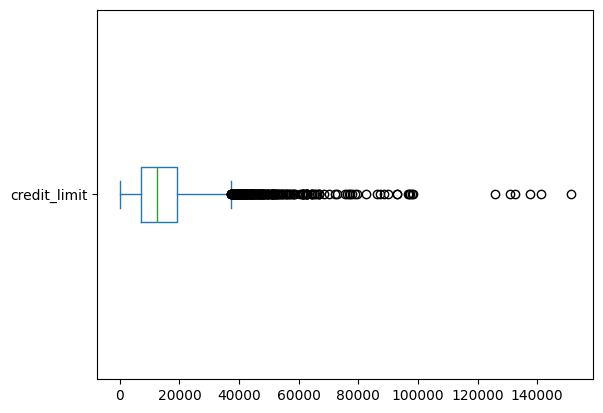

In [73]:
df["credit_limit"].plot.box(vert=False)

<Axes: ylabel='Frequency'>

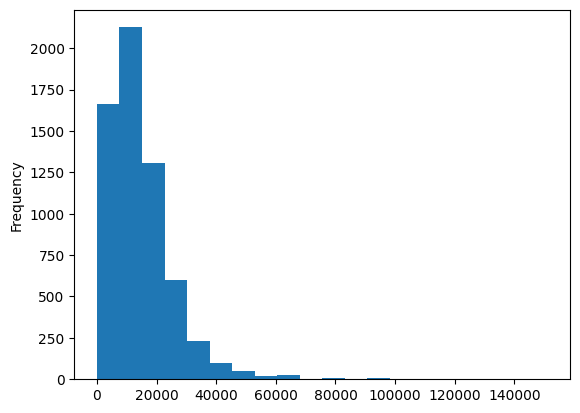

In [74]:
df["credit_limit"].plot.hist(bins=20)

In [75]:
df["credit_limit"].describe()

count      6146.000000
mean      14347.493980
std       12014.463884
min           0.000000
25%        7042.750000
50%       12592.500000
75%       19156.500000
max      151223.000000
Name: credit_limit, dtype: float64

In [76]:
df["credit_limit"] = df["credit_limit"].replace(0,0.000000000001)

In [77]:
df["credit_limit"].describe()

count    6.146000e+03
mean     1.434749e+04
std      1.201446e+04
min      1.000000e-12
25%      7.042750e+03
50%      1.259250e+04
75%      1.915650e+04
max      1.512230e+05
Name: credit_limit, dtype: float64

Log Transformation

In [78]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [79]:
lt = FunctionTransformer(func=np.log1p)

In [80]:
transformed_credit_limit = lt.fit_transform(df[["credit_limit"]])

In [81]:
transformed_credit_limit

,credit_limit
0,10.098067
1,9.997388
2,10.745378
3,9.425532
4,3.367296
...,...
6141,8.839422
6142,8.648397
6143,9.127067
6144,10.242635


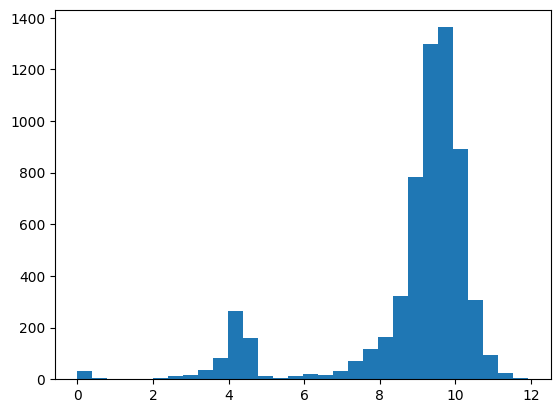

In [82]:
plt.hist(transformed_credit_limit, bins=30)
plt.show()

In [83]:
pt= PowerTransformer(method ="yeo-johnson")

In [84]:
pt_credit_limit = pt.fit_transform(df[["credit_limit"]])

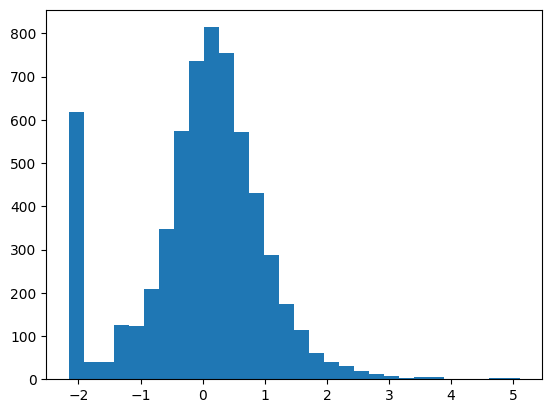

In [85]:
plt.hist(pt_credit_limit, bins=30)
plt.show()

In [86]:
pt_credit_limit.mean()

np.float64(3.005875549912562e-16)

In [87]:
pt_credit_limit.std()

np.float64(1.0)

In [88]:
df["card_brand"]

0             Visa
1             Visa
2             Visa
3             Visa
4       Mastercard
           ...    
6141          Amex
6142          Visa
6143    Mastercard
6144    Mastercard
6145          Visa
Name: card_brand, Length: 6146, dtype: object

In [89]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
ohe = OneHotEncoder()

In [91]:
encoded_card_brand = ohe.fit_transform(df[["card_brand"]])

In [92]:
encoded_card_brand

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6146 stored elements and shape (6146, 4)>

In [93]:
encoded_card_brand.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], shape=(6146, 4))

In [94]:
ohe.get_feature_names_out()

array(['card_brand_Amex', 'card_brand_Discover', 'card_brand_Mastercard',
       'card_brand_Visa'], dtype=object)

In [95]:
pd.DataFrame(encoded_card_brand.toarray(), columns=ohe.get_feature_names_out())

,card_brand_Amex,card_brand_Discover,card_brand_Mastercard,card_brand_Visa
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
6141,1.0,0.0,0.0,0.0
6142,0.0,0.0,0.0,1.0
6143,0.0,0.0,1.0,0.0
6144,0.0,0.0,1.0,0.0


In [96]:
dummy = df.update(pd.DataFrame(encoded_card_brand.toarray(), columns=ohe.get_feature_names_out()))

In [97]:
df = pd.concat([df, dummy], axis = 1).drop('card_brand', axis=1)

In [98]:
df

,client_id,card_type,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,current_age,retirement_age,birth_year,...,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,acc_open_month,acc_open_year
0,825,Debit,YES,2,24295.0,09/2002,2008,53,66,1966,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,09,2002
1,825,Debit,YES,2,21968.0,04/2014,2014,53,66,1966,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,04,2014
2,825,Debit,YES,2,46414.0,07/2003,2004,53,66,1966,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,07,2003
3,825,Credit,NO,1,12400.0,01/2003,2012,53,66,1966,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,01,2003
4,825,Debit (Prepaid),YES,1,28.0,09/2008,2009,53,66,1966,...,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,09,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,185,Credit,YES,1,6900.0,11/2000,2013,47,67,1973,...,276 Fifth Boulevard,40.66,-74.19,15175,30942,71066,779,3,11,2000
6142,185,Credit,YES,2,5700.0,04/2012,2012,47,67,1973,...,276 Fifth Boulevard,40.66,-74.19,15175,30942,71066,779,3,04,2012
6143,1007,Credit,NO,2,9200.0,02/2012,2012,66,60,1954,...,259 Valley Boulevard,40.24,-76.92,25336,54654,27241,618,1,02,2012
6144,1110,Debit,YES,1,28074.0,01/2020,2020,21,60,1998,...,472 Ocean View Street,42.86,-71.48,32325,65909,181261,673,2,01,2020


In [99]:
df.select_dtypes(include="object")

,card_type,has_chip,acct_open_date,gender,address,acc_open_month,acc_open_year
0,Debit,YES,09/2002,Female,462 Rose Lane,09,2002
1,Debit,YES,04/2014,Female,462 Rose Lane,04,2014
2,Debit,YES,07/2003,Female,462 Rose Lane,07,2003
3,Credit,NO,01/2003,Female,462 Rose Lane,01,2003
4,Debit (Prepaid),YES,09/2008,Female,462 Rose Lane,09,2008
...,...,...,...,...,...,...,...
6141,Credit,YES,11/2000,Female,276 Fifth Boulevard,11,2000
6142,Credit,YES,04/2012,Female,276 Fifth Boulevard,04,2012
6143,Credit,NO,02/2012,Male,259 Valley Boulevard,02,2012
6144,Debit,YES,01/2020,Female,472 Ocean View Street,01,2020


In [100]:
df.columns

Index(['client_id', 'card_type', 'has_chip', 'num_cards_issued',
       'credit_limit', 'acct_open_date', 'year_pin_last_changed',
       'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender',
       'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
       'acc_open_month', 'acc_open_year'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              6146 non-null   int64  
 1   card_type              6146 non-null   object 
 2   has_chip               6146 non-null   object 
 3   num_cards_issued       6146 non-null   int64  
 4   credit_limit           6146 non-null   float64
 5   acct_open_date         6146 non-null   object 
 6   year_pin_last_changed  6146 non-null   int64  
 7   current_age            6146 non-null   int64  
 8   retirement_age         6146 non-null   int64  
 9   birth_year             6146 non-null   int64  
 10  birth_month            6146 non-null   int64  
 11  gender                 6146 non-null   object 
 12  address                6146 non-null   object 
 13  latitude               6146 non-null   float64
 14  longitude              6146 non-null   float64
 15  per_

In [102]:
df["acc_open_month"] = df["acc_open_month"].astype(int)

In [103]:
df["acc_open_year"] = df["acc_open_year"].astype(int)

In [104]:
df.drop("acct_open_date",axis=1, inplace=True)

In [105]:
df.select_dtypes(include="object")

,card_type,has_chip,gender,address
0,Debit,YES,Female,462 Rose Lane
1,Debit,YES,Female,462 Rose Lane
2,Debit,YES,Female,462 Rose Lane
3,Credit,NO,Female,462 Rose Lane
4,Debit (Prepaid),YES,Female,462 Rose Lane
...,...,...,...,...
6141,Credit,YES,Female,276 Fifth Boulevard
6142,Credit,YES,Female,276 Fifth Boulevard
6143,Credit,NO,Male,259 Valley Boulevard
6144,Debit,YES,Female,472 Ocean View Street


In [106]:
df["address"].value_counts()

address
31 Hillside Lane          9
7945 Fourth Avenue        9
9530 Washington Street    9
374 Lexington Street      8
3631 Plum Boulevard       8
                         ..
6144 Summit Street        1
781 East Street           1
829 Fourth Boulevard      1
8677 Littlewood Lane      1
887 Grant Street          1
Name: count, Length: 1999, dtype: int64

In [107]:
df.drop("address", axis=1, inplace=True)

In [108]:
cat_cols = df.select_dtypes(include="object").columns

In [109]:
cat_cols

Index(['card_type', 'has_chip', 'gender'], dtype='object')

In [110]:
ohe2 = OneHotEncoder(drop="first")

In [111]:
encoded_cat_cols = ohe2.fit_transform(df[cat_cols])

In [112]:
encoded_cat_cols

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12596 stored elements and shape (6146, 4)>

In [113]:
ohe2.get_feature_names_out()

array(['card_type_Debit', 'card_type_Debit (Prepaid)', 'has_chip_YES',
       'gender_Male'], dtype=object)

In [114]:
dummy = pd.DataFrame(encoded_cat_cols.toarray(), columns=ohe2.get_feature_names_out())

In [115]:
df = pd.concat([df, dummy], axis=1).drop(cat_cols, axis=1)

In [116]:
df.head()

,client_id,num_cards_issued,credit_limit,year_pin_last_changed,current_age,retirement_age,birth_year,birth_month,latitude,longitude,...,yearly_income,total_debt,credit_score,num_credit_cards,acc_open_month,acc_open_year,card_type_Debit,card_type_Debit (Prepaid),has_chip_YES,gender_Male
0,825,2,24295.0,2008,53,66,1966,11,34.15,-117.76,...,59696,127613,787,5,9,2002,1.0,0.0,1.0,0.0
1,825,2,21968.0,2014,53,66,1966,11,34.15,-117.76,...,59696,127613,787,5,4,2014,1.0,0.0,1.0,0.0
2,825,2,46414.0,2004,53,66,1966,11,34.15,-117.76,...,59696,127613,787,5,7,2003,1.0,0.0,1.0,0.0
3,825,1,12400.0,2012,53,66,1966,11,34.15,-117.76,...,59696,127613,787,5,1,2003,0.0,0.0,0.0,0.0
4,825,1,28.0,2009,53,66,1966,11,34.15,-117.76,...,59696,127613,787,5,9,2008,0.0,1.0,1.0,0.0


In [117]:
df["client_id"].value_counts()

client_id
1741    9
797     9
1301    9
20      8
989     8
       ..
97      1
1590    1
1679    1
640     1
1752    1
Name: count, Length: 2000, dtype: int64

In [118]:
df["year_pin_last_changed"].value_counts()

year_pin_last_changed
2020    1208
2011     809
2010     712
2012     477
2013     465
2009     456
2014     397
2015     341
2008     303
2016     234
2007     177
2017     162
2018     156
2019     115
2006      73
2005      36
2004      12
2003      11
2002       2
Name: count, dtype: int64

In [119]:
df["birth_year"].value_counts()

birth_year
1970    182
1967    144
1972    136
1969    132
1961    128
       ... 
1928     12
1921     12
1930     12
1920      8
1918      4
Name: count, Length: 80, dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   client_id                  6146 non-null   int64  
 1   num_cards_issued           6146 non-null   int64  
 2   credit_limit               6146 non-null   float64
 3   year_pin_last_changed      6146 non-null   int64  
 4   current_age                6146 non-null   int64  
 5   retirement_age             6146 non-null   int64  
 6   birth_year                 6146 non-null   int64  
 7   birth_month                6146 non-null   int64  
 8   latitude                   6146 non-null   float64
 9   longitude                  6146 non-null   float64
 10  per_capita_income          6146 non-null   int64  
 11  yearly_income              6146 non-null   int64  
 12  total_debt                 6146 non-null   int64  
 13  credit_score               6146 non-null   int64

In [121]:
#Credit Limit Will be consideared As target column
X = df.drop("credit_limit", axis = 1)
y = df["credit_limit"]

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=24)

In [124]:
X_train

,client_id,num_cards_issued,year_pin_last_changed,current_age,retirement_age,birth_year,birth_month,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,acc_open_month,acc_open_year,card_type_Debit,card_type_Debit (Prepaid),has_chip_YES,gender_Male
3258,1810,1,2009,66,66,1953,12,42.22,-83.36,18879,31175,5846,711,5,12,2008,0.0,0.0,1.0,1.0
3949,468,1,2011,48,65,1971,9,41.65,-91.53,23238,47374,35312,714,2,11,2008,1.0,0.0,1.0,0.0
5895,833,1,2020,21,65,1998,11,40.85,-74.10,21827,44501,37251,683,2,1,2020,1.0,0.0,1.0,0.0
3386,213,1,2020,37,68,1982,5,32.91,-96.62,27057,55172,96779,629,3,2,2020,1.0,0.0,1.0,0.0
5715,928,1,2013,59,66,1960,12,29.76,-95.38,15862,32347,82667,784,7,8,2010,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,1917,2,2009,49,69,1970,5,40.92,-72.92,28694,58503,37838,680,4,11,2009,0.0,0.0,1.0,1.0
3473,1369,2,2009,59,67,1961,1,39.35,-85.96,17585,35854,49101,850,2,6,2007,0.0,0.0,1.0,0.0
343,1301,1,2020,26,66,1993,5,38.10,-122.63,30335,61850,81158,728,9,1,2020,0.0,0.0,1.0,0.0
899,866,2,2020,34,67,1985,3,40.43,-79.97,30361,61904,125358,639,3,2,2020,1.0,0.0,1.0,1.0


In [125]:
y_train

3258    10600.0
3949    21900.0
5895    16736.0
3386    37778.0
5715     7300.0
         ...   
2193    13000.0
3473     9000.0
343     19000.0
899      9542.0
4514    18699.0
Name: credit_limit, Length: 4609, dtype: float64